# 3. Machine Learning for Classification

Hi I'm Jaime Hipólito, these are my note from the thrid session of the ML ZoomCamp.

You can find me in [LinkedIn](https://www.linkedin.com/in/jaimeh94/) and [Twitter](https://twitter.com/jaimeh94_).

## 3.1 Churn prediction project
The project is about two companies of telecomunications and we will try to predict which costumer is thinking to leave from company, who are going to churn.

The approache tha we gointo to do is the binary classification. That means that the prediction will be only 0 or 1, True or False, in this case: to churn or not to churn. 

For this we will use Logistic Regression.

## 3.2 Data preparation
We going to import the libraries and get the data, look and preparate the data

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt

In [222]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

if not os.path.isfile('./data-week-3'):
    !wget $data -O data-week-3.csv

--2021-09-21 23:08:09--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K   877KB/s    in 1.1s    

2021-09-21 23:08:22 (877 KB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [223]:
df = pd.read_csv('data-week-3.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [225]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


---
Here we gointo to make the names uniform

---

In [226]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [227]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [228]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

---
Above we find that type of totalcharges is object instead of numeric, so we going to become it into a numeric varible, this variable contains some nan values, so we use the parameter errors. Then we fill the nan values with 0

In [229]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce').fillna(0)

---
We goint to prepare the churn variable. We going to convert no to 0 and yes to 1

In [230]:
df.churn = (df.churn == 'yes').astype(int)

In [231]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


## 3.3 Setting up the validation framework
We going to perform the train/validation/test split with Scikit-Learn

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
# Uncomment to get the help
# train_test_split?
# put the '?' signe is similar to help

---
With the comand ? we find that the structure of the function is:

Signature:
```
train_test_split(
    *arrays,    
    test_size=None,    
    train_size=None,    
    random_state=None,    
    shuffle=True,    
    stratify=None,    
)
```
So we can modify the train and test size, and make the tree sets (train, val, test) that we do before, also we can select a random state to get the same results every iteration

In [234]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

---
now from df_full_train we get the train and val sets, in this case the parameter test_size have to be 0.25 (0.2/0.8), this way the size of df_val will be 20% of the whole df

In [235]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [236]:
print(len(df))
print(len(df_train) + len(df_val) + len(df_test))
print(len(df_train), len(df_val), len(df_test))

7043
7043
4225 1409 1409


---
now we going to reset the index in the sets 


In [237]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

---
To least we get the 'y' varibles

In [238]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 Exploratory Data Analysis (EDA)
* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

---
I think we should have done this before Setting up the framework

In [239]:
df_full_train = df_full_train.reset_index(drop=True)

In [240]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [241]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [242]:
df_full_train.churn.value_counts(normalize=True)


0    0.730032
1    0.269968
Name: churn, dtype: float64

In [243]:
# The churn rate is 0.269968
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [244]:
numerical_features = ['tenure', 'monthlycharges', 'totalcharges']

In [245]:
categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [246]:
df_full_train[categorical_features].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [247]:
for i in categorical_features:
    print(i)
    print(df_full_train[i].unique())
    print()

gender
['male' 'female']

seniorcitizen
[0 1]

partner
['yes' 'no']

dependents
['yes' 'no']

phoneservice
['yes' 'no']

multiplelines
['no' 'yes' 'no_phone_service']

internetservice
['no' 'dsl' 'fiber_optic']

onlinesecurity
['no_internet_service' 'yes' 'no']

onlinebackup
['no_internet_service' 'yes' 'no']

deviceprotection
['no_internet_service' 'yes' 'no']

techsupport
['no_internet_service' 'yes' 'no']

streamingtv
['no_internet_service' 'no' 'yes']

streamingmovies
['no_internet_service' 'yes' 'no']

contract
['two_year' 'one_year' 'month-to-month']

paperlessbilling
['no' 'yes']

paymentmethod
['mailed_check' 'credit_card_(automatic)' 'bank_transfer_(automatic)'
 'electronic_check']



## 3.5 Feature Importance: Churn Rate And Risk Ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

### Churn rate

In [248]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
global_churn = df_full_train.churn.mean()
print(f'churn_male is {churn_male}')
print(f'churn_female is {churn_female}')
print(f'global_churn is {global_churn}')

churn_male is 0.2632135306553911
churn_female is 0.27682403433476394
global_churn is 0.26996805111821087


---
male and female churns are not so different to global

In [249]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
print(f'churn_partner is {churn_partner}')
print(f'churn_no_partner is {churn_no_partner}')
print(f'differecen of churn_partner from global is {(global_churn-churn_partner)*100}\% ')
print(f'differecen of churn_no_partner from global is {(global_churn-churn_no_partner)*100}\% ')

churn_partner is 0.20503330866025166
churn_no_partner is 0.3298090040927694
differecen of churn_partner from global is 6.493474245795921\% 
differecen of churn_no_partner from global is -5.984095297455855\% 


---
Here we find a considerable difference, this could tell us that the feature partner is more important for prediction

global_churn-churn'group' if this is > 0, that means that this 'group' **is less likely to churn** and 
if global_churn-churn'group' is > 0, that means that this 'group' is **more likely to churn**

### Risk ratio
So this way, we can calculate the risk ratio dividing churm'group'/global

$Risk\_ratio=\frac{group\_churn}{global\_churn}$

In [250]:
churn_no_partner / global_churn # 22% higher

1.2216593879412643

In [251]:
churn_partner / global_churn # 24% LOWER

0.7594724924338315

---
In this case if risk ratio > 1 is **more likely to churn** 

and if risk ratio < 1 is **less likely to churn**

---
With this principles we going to analice the other variables

---

This is the secuence like sql that we going to implement
```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [252]:
from IPython.display import display

to display all the DataFrame from the loop, we need to use the function 'display' from IPython library

In [253]:
for c in categorical_features:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


With this we get a lot of information about the categories. it seems that the feature contract is one of the more importants

## 3.6 Feature importance: Mutual information¶
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

* From [wikipedia](https://en.wikipedia.org/wiki/Mutual_information) 

    In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (in units such as shannons (bits), nats or hartleys) obtained about one random variable by observing the other random variable. The concept of mutual information is intimately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable.

The way that we can think of this is how much do learn about churn if they observe the value of contract, if we know that this particular customer has a month to month contract how much do we know about churn

In [254]:
from sklearn.metrics import mutual_info_score
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [255]:
def mutual_info_churn_score(series):
    """
    This tell us how much do we learn about churn by observing the value of 'series'
    """
    return mutual_info_score(series, df_full_train.churn)

In [256]:
mi = df_full_train[categorical_features].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

---
We can see that variables gender, phoneservice and multiplelines are not so important, opposite to varible contract that **is the more important**

## 3.7 Feature importance: Correlation¶
How about numerical columns?

Correlation coefficient 
* From [Wikipedia-es](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)

    Pearson correlation coefficient is a measure of linear dependence between two quantitative random variables. Unlike the covariance, the Pearson correlation is independent of the measurement scale of the variables.

    In a less formal way, we can define Pearson's correlation coefficient as an index that can be used to measure the degree of relationship of two variables as long as they are both quantitative and continuous.

**Interpretación** (spanish)

El valor del índice de correlación varía en el intervalo <math>[-1,1]</math>, indicando el signo el sentido de la relación:

* Si ''<math>r=1</math>'', existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada ''relación directa'': cuando una de ellas aumenta, la otra también lo hace en proporción constante.
* Si <math>0<r<1</math> entonces existe una correlación positiva.
* Si ''<math>r=0</math>'' entonces no existe relación lineal pero esto no necesariamente implica que las variables son [[Independencia (probabilidad)|independientes]]: pueden existir todavía relaciones no lineales entre las dos variables.
* Si ''<math>-1<r<0</math>'', existe una correlación negativa.
* Si ''<math>r=-1</math>'', existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada ''relación inversa'': cuando una de ellas aumenta, la otra disminuye en proporción constante.

![Correlation examples](600px-Correlation_examples2.png "Correlation examples")

---
Let's analice our numerical varibles agaist churn

In [257]:
df_full_train[numerical_features].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

---
Here we see that tenere has a negative correlation, while monthlycharges has a positive correlation

---

---
The next is a function to plot the correlation between the numerical variables and the churn ratio

*still need to fix it*

In [258]:
def churn_ratio_correlation_plot(serie, n_bins):
    split = np.array_split((serie.sort_values()).index.copy(), n_bins)
    churn_ratio_corr=[]
    for i in split:
        ch_r = df_full_train.churn[i].mean()
        churn_ratio_corr.append(ch_r)
    print(serie.name)
    plt.figure(figsize= (6, 6))    
    display(plt.plot(churn_ratio_corr, label=serie.name))
    

tenure


monthlycharges


totalcharges


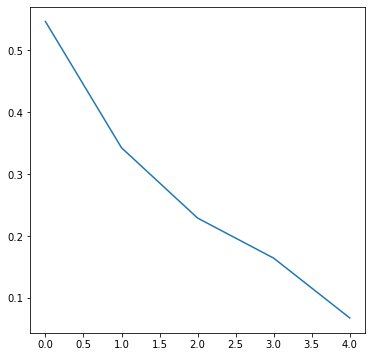

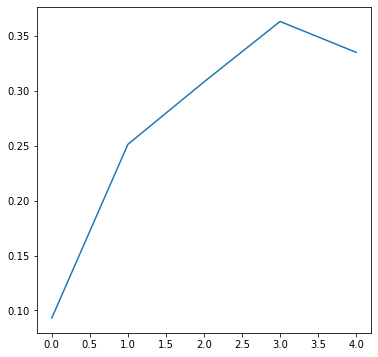

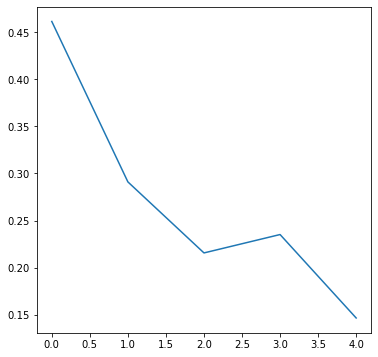

In [259]:
for feature in numerical_features:
    churn_ratio_correlation_plot(df_full_train[feature],5)

## Feature Engenering

### 3.8 One-hot encoding
Use Scikit-Learn to encode categorical features

Due that we cannot use categorical variables directly in machine learning, we use a technic to make it useful, this technic is encoding the varibles, and one way is **onehot enconding**

In this session Alexey use the module ```from sklearn.feature_extraction import DictVectorizer``` instead of ```from sklearn.preprocessing import OneHotEncoder``` the answer in Slack was:
- OneHotEncoder: "The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features."

    DictVectorizer: "This transformer turns lists of mappings (dict-like objects) of feature names to feature values into Numpy arrays"

    So, I OHE expects an array per row and DV expects and array of dictionaries

In [260]:
from sklearn.feature_extraction import DictVectorizer

In [261]:
df_train[['gender', 'contract']].iloc[:20]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [262]:
print(df_train.gender.nunique())
print(df_train.contract.nunique())

2
3


We have two unique values in gender and tree unique values in contract, so we will get 5 columns after de encoding

---

In [263]:
dicts = df_train[['gender', 'contract']].iloc[:20].to_dict(orient='records')

In [264]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts) # Here dv learn what kind of data is this

DictVectorizer(sparse=False)

In [265]:
dv.transform(dicts) # here dv makes the transformation

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.]])

In [266]:
dv.get_feature_names() # Here we can see the name of every column of the transformation

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

---
DictVectorizer is **smart** because if we pass a numerical variable it leaves intact without any transformation


In [267]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:20].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dicts) # Here dv learn what kind of data is this
dv.get_feature_names() # Here we can see the name of every column of the transformation
dv.transform(dicts) # here dv makes the transformation

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.]])

In [268]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict) # Here the DV fit and transform in the same function

val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Machine learning for classification
## 3.9 Logistic regression
* Binary classification
* Linear vs logistic regression    